# **PRACTICA 2**

**Limpiar un conjunto de datos reales, identificando valores faltantes, outliers, normalizando, estandarizando y codificando datos mediante herramientas como Python y Rapidminer.**

In [58]:
import pandas as pd
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

**Cargar archivo y Mostrar las primeras filas**

In [2]:
import os

# Listar archivos del directorio actual para verificar
print(os.listdir('.'))


['.config', 'sample_data']


In [4]:
df = pd.read_csv('/content/preparacion_datos_3.csv')
df.head()

,LotArea,Street,Alley,LotShape,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,...,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageCars,GarageArea,PoolArea,PoolQC,Fence,SalePrice
0,8450.0,Pave,NaN,Reg,Inside,Gtl,1Fam,2Story,7,5,...,8.0,0,NaN,Attchd,2,548,0,NaN,NaN,208500.0
1,NaN,Pave,NaN,Reg,FR2,Gtl,1Fam,1Story,6,8,...,6.0,1,TA,Attchd,2,460,0,NaN,NaN,181500.0
2,11250.0,Pave,NaN,IR1,Inside,Gtl,1Fam,2Story,7,5,...,6.0,1,TA,NaN,2,608,0,NaN,NaN,223500.0
3,9550.0,Pave,NaN,IR1,Corner,Gtl,1Fam,2Story,7,5,...,7.0,1,Gd,Detchd,3,642,0,NaN,NaN,140000.0
4,14260.0,Pave,NaN,IR1,FR2,Gtl,1Fam,2Story,8,5,...,NaN,1,TA,Attchd,3,836,0,NaN,NaN,250000.0


## **Describa el dataset**

**Información general del DataFrame**

El conjunto de datos contiene información detallada sobre características físicas, estructurales y de entorno de diversas propiedades inmobiliarias. Es típicamente usado para análisis predictivo del precio de venta de viviendas.

- ***Total de columnas:*** 35
- ***Total de registros:*** 1460 observaciones aprox.
- ***Tipo de variables:***
  - *Numéricas continuas:* Ej. LotArea, SalePrice, GarageArea
  - *Numéricas discretas:* Ej. GarageCars, Fireplaces
  - *Categóricas (object):* Ej. Street, BldgType, KitchenQual

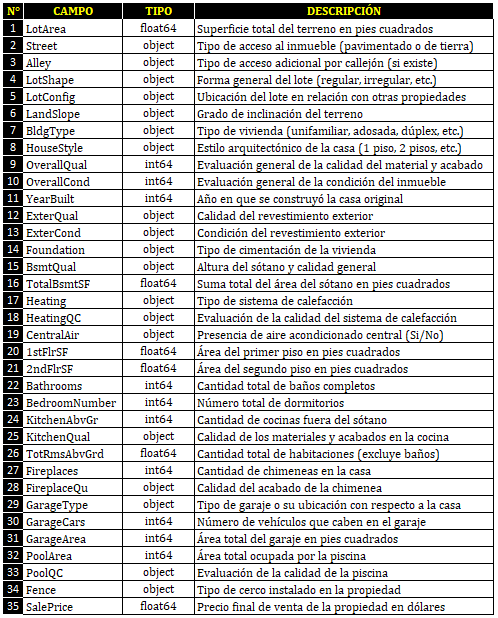

## **Describa los pasos realizados**

**1. Se cargaron las bibliotecas requeridas para el análisis de datos:**

- pandas y numpy para manipulación y análisis de datos.

- matplotlib.pyplot y seaborn para visualización gráfica.

- sklearn.metrics para futuras evaluaciones de modelos predictivos.

- warnings para suprimir mensajes de advertencia y mantener el entorno limpio.

**2. Se leyó el archivo preparacion_datos_3.csv utilizando la función read_csv() de pandas.**
Este archivo contiene datos sobre propiedades inmobiliarias y sus características físicas, estructurales y de entorno.

**3. Se utilizaron las primeras filas del DataFrame (df.head()) para observar:**

- El contenido de los datos,

- La estructura del dataset,

- Los valores faltantes visibles (NaN) en algunas columnas como Alley, FireplaceQu, PoolQC y Fence.

**4. Se elaboró una breve descripción del conjunto de datos, destacando:**

- Que contiene 35 columnas y 1460 registros.

- *El objetivo potencial de uso:* predicción del precio de venta de viviendas.

- El tipo de variables:

  - Numéricas continuas (ej. LotArea, SalePrice, GarageArea)

  - Numéricas discretas (ej. GarageCars, Fireplaces)

  - Categóricas (ej. Street, BldgType, KitchenQual)

## **Inicie con la exploración de la data.**

In [9]:
print("Información general del DataFrame:")
df.info()
print("\n")

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1333 non-null   float64
 1   Street         1460 non-null   object 
 2   Alley          91 non-null     object 
 3   LotShape       1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   LandSlope      1460 non-null   object 
 6   BldgType       1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  ExterQual      1460 non-null   object 
 12  ExterCond      1460 non-null   object 
 13  Foundation     1460 non-null   object 
 14  BsmtQual       1422 non-null   object 
 15  TotalBsmtSF    1460 non-null   float64
 16  Heating        1460 non-null   object 
 17  HeatingQC      14

In [10]:
# Conteo de valores nulos por columna
print("Conteo de valores nulos por columna:")
print(df.isnull().sum(), "\n")

Conteo de valores nulos por columna:
LotArea           127
Street              0
Alley            1369
LotShape            0
LotConfig           0
LandSlope           0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           38
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
Bathrooms           0
BedroomNumber       0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd       45
Fireplaces          0
FireplaceQu       690
GarageType         82
GarageCars          0
GarageArea          0
PoolArea            0
PoolQC           1453
Fence            1179
SalePrice           0
dtype: int64 



In [11]:
# Estadísticas descriptivas para columnas numéricas
print("Estadísticas descriptivas (columnas numéricas):")
print(df.describe(), "\n")

Estadísticas descriptivas (columnas numéricas):
             LotArea  OverallQual  OverallCond    YearBuilt  TotalBsmtSF  \
count    1333.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10585.861965     6.099315     5.575342  1971.267808  1057.429452   
std     10370.320653     1.382997     1.112799    30.202904   438.705324   
min      1300.000000     1.000000     1.000000  1872.000000     0.000000   
25%      7558.000000     5.000000     5.000000  1954.000000   795.750000   
50%      9453.000000     6.000000     5.000000  1973.000000   991.500000   
75%     11625.000000     7.000000     6.000000  2000.000000  1298.250000   
max    215245.000000    10.000000     9.000000  2010.000000  6110.000000   

          1stFlrSF     2ndFlrSF    Bathrooms  BedroomNumber  KitchenAbvGr  \
count  1460.000000  1460.000000  1460.000000    1460.000000   1460.000000   
mean   1162.626712   346.992466     1.565068       2.866438      1.046575   
std     386.587738   436.528436     

In [12]:
# Estadísticas para columnas categóricas (tipo 'object')
print("Estadísticas descriptivas (columnas categóricas):")
print(df.describe(include=['object']))

Estadísticas descriptivas (columnas categóricas):
       Street Alley LotShape LotConfig LandSlope BldgType HouseStyle  \
count    1460    91     1460      1460      1460     1460       1460   
unique      2     2        4         5         3        5          8   
top      Pave  Grvl      Reg    Inside       Gtl     1Fam     1Story   
freq     1454    50      925      1052      1382     1220        726   

       ExterQual ExterCond Foundation BsmtQual Heating HeatingQC CentralAir  \
count       1460      1460       1460     1422    1460      1460       1460   
unique         4         5          6        4       6         5          2   
top           TA        TA      PConc       TA    GasA        Ex          Y   
freq         906      1282        647      649    1428       741       1365   

       KitchenQual FireplaceQu GarageType PoolQC  Fence  
count         1460         770       1378      7    281  
unique           4           5          6      3      4  
top             TA 

# **Justifique el orden de la limpieza de datos (detección de outliers, datos faltantes, datos erróneos, normalización/estandarización, codificación).**

**1. Detección y análisis de datos faltantes**

  Es fundamental identificar las columnas con datos faltantes (NaN) al inicio, Esta etapa es crítica porque impacta directamente en la calidad del análisis, en la toma de decisiones estadísticas y en el funcionamiento de cualquier modelo predictivo posterior. ya que:
  
  - Permite evaluar la integridad del dataset, reconociendo qué columnas están completas y cuáles requieren tratamiento.
  
  - Determina si las columnas deben imputarse, eliminarse o dejarse como están.

  - Algunas variables como PoolQC, Alley, Fence, tienen una gran cantidad de ausencias que podrían significar “no aplica” más que "desconocido".

  - Las decisiones de imputación afectan el resto de los procesos, especialmente la codificación y estandarización.


*Ejemplo en el dataset:* Alley tiene más del 90% de datos faltantes, por lo que puede eliminarse o transformarse en una categoría (“Sin acceso”).

In [13]:
df['Alley'].fillna('Sin acceso', inplace=True)

In [14]:
df['PoolQC'].fillna('Sin piscina', inplace=True)

In [15]:
df['Fence'].fillna('Sin cerca', inplace=True)

In [16]:
df['GarageType'].fillna('Sin garage', inplace=True)

LotArea (Área del terreno):

Es una variable numérica continua, se usa la mediana es lo más prudente si hay variabilidad alta.

In [17]:
df['LotArea'].fillna(df['LotArea'].median(), inplace=True)

TotRmsAbvGrd (total de habitaciones sobre el nivel del suelo):

Es un número discreto, con valores repetitivos. La moda es una buena opción si hay un número común de habitaciones.

In [18]:
df['TotRmsAbvGrd'].fillna(df['TotRmsAbvGrd'].mode()[0], inplace=True)

In [19]:
print("Conteo de valores nulos por columna:")
print(df.isnull().sum(), "\n")

Conteo de valores nulos por columna:
LotArea            0
Street             0
Alley              0
LotShape           0
LotConfig          0
LandSlope          0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          38
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
Bathrooms          0
BedroomNumber      0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu      690
GarageType         0
GarageCars         0
GarageArea         0
PoolArea           0
PoolQC             0
Fence              0
SalePrice          0
dtype: int64 



**2. Detección y corrección de datos erróneos**

Una vez tratadas las ausencias de información (valores faltantes), el siguiente paso en la limpieza del dataset es identificar posibles errores en los datos, es decir, valores que no son nulos pero que violan la lógica del negocio, relaciones esperadas o condiciones reales.

Estos errores, si no se corrigen, pueden afectar negativamente a los análisis descriptivos y, sobre todo, a los modelos predictivos, generando distorsiones o resultados engañosos.

**Errores fuera de rango lógico**

1. Verificación de años futuros en YearBuilt (año de construcción) no puede ser mayor al año actual

In [20]:
df[df['YearBuilt'] > 2025]

,LotArea,Street,Alley,LotShape,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,...,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageCars,GarageArea,PoolArea,PoolQC,Fence,SalePrice


2. Detección de garajes inusualmente grandes, no debería superar un número realista (ej. 4 o 5 vehículos).

In [21]:
df[df['GarageCars'] > 5]

,LotArea,Street,Alley,LotShape,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,...,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageCars,GarageArea,PoolArea,PoolQC,Fence,SalePrice


**Inconsistencias entre columnas relacionadas**

 Si hay área de garaje pero sin autos, podría tratarse de una mala codificación.

 GarageArea = 0, entonces GarageCars también debería ser 0.

 PoolArea > 0, entonces PoolQC no debería estar vacío.

In [22]:
df[(df['GarageCars'] == 0) & (df['GarageArea'] > 0)]

,LotArea,Street,Alley,LotShape,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,...,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageCars,GarageArea,PoolArea,PoolQC,Fence,SalePrice


**Detección de duplicados**

Si existen filas duplicadas, se recomienda eliminarlas para evitar sesgos

In [23]:
df.duplicated().sum()

np.int64(0)

**Errores de codificación o tipográficos en variables categóricas**

Revisión de valores únicos

In [24]:
df['KitchenQual'].unique()

array(['Gd', 'TA', 'EX', 'FA'], dtype=object)

In [25]:
df['KitchenQual'].value_counts(dropna=False)


,count
KitchenQual,
TA,735
Gd,586
EX,100
FA,39


**Calcule al menos con 4 técnicas de detección de Outliers en cada herramienta. Muestre la cantidad de outliers encontrados.**

Definir variables a analizar

In [38]:
# Definir las variables con mayor cantidad de outliers (según análisis previo)
top_vars = ['OverallCond', 'KitchenAbvGr', 'LotArea', 'TotalBsmtSF']

Aplicar detección con IQR

In [39]:
for col in top_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[f'{col}_IQR'] = ((df[col] < lower) | (df[col] > upper)).astype(int)

Aplicar Z-Score

In [40]:
for col in top_vars:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    threshold = 3
    z_outliers = pd.Series(0, index=df.index)
    z_outliers[df[col].dropna().index] = (z_scores > threshold).astype(int)
    df[f'{col}_ZScore'] = z_outliers

Aplicar Isolation Forest

In [41]:
for col in top_vars:
    iso = IsolationForest(contamination=0.05, random_state=42)
    preds = iso.fit_predict(df[[col]].fillna(0))
    df[f'{col}_IForest'] = (preds == -1).astype(int)

Aplicar Local Outlier Factor (LOF)

In [42]:
for col in top_vars:
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    preds = lof.fit_predict(df[[col]].fillna(0))
    df[f'{col}_LOF'] = (preds == -1).astype(int)

Resumen total de outliers por técnica

In [43]:
summary = {}
for col in top_vars:
    summary[col] = {
        "IQR": int(df[f'{col}_IQR'].sum()),
        "Z-Score": int(df[f'{col}_ZScore'].sum()),
        "IsolationForest": int(df[f'{col}_IForest'].sum()),
        "LOF": int(df[f'{col}_LOF'].sum()),
    }
summary_df = pd.DataFrame(summary).T
summary_df

,IQR,Z-Score,IsolationForest,LOF
OverallCond,125,28,53,6
KitchenAbvGr,68,68,68,3
LotArea,123,13,73,73
TotalBsmtSF,61,10,68,73


Crear heatmap de los outliers detectados por técnica

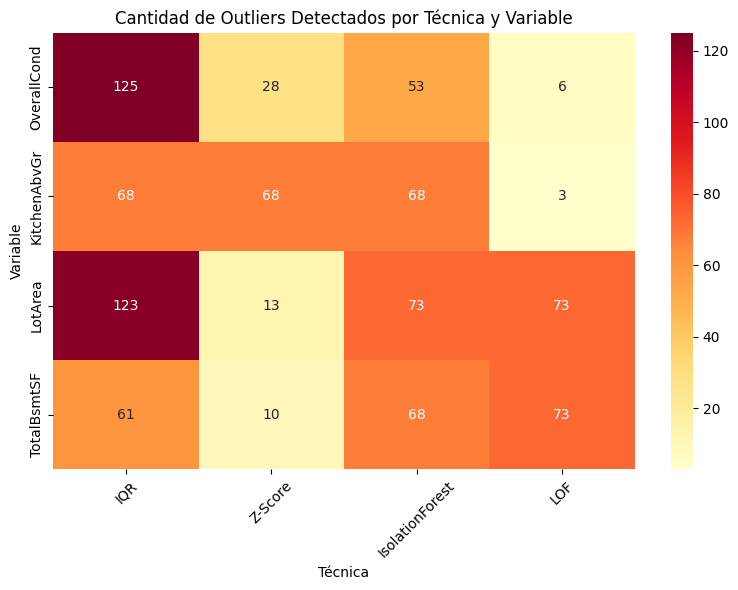

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(summary_df, annot=True, cmap="YlOrRd", fmt='d')
plt.title('Cantidad de Outliers Detectados por Técnica y Variable')
plt.ylabel('Variable')
plt.xlabel('Técnica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interprete los outliers encontrados por cada campo y por cada técnica (Tabla o gráfico).

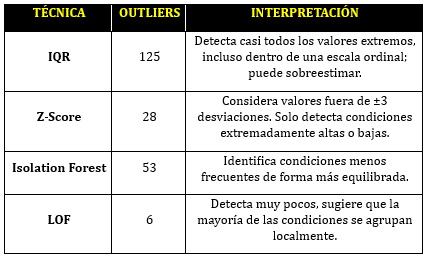

**Revisar posibles errores lógicos o inconsistencias en la data**

In [35]:
# 1. YearBuilt mayor al año actual (suponemos 2025 como año de referencia)
errores_yearbuilt = df[df['YearBuilt'] > 2025]
# 2. GarageCars mayor a 5 (poco realista para vivienda común)
errores_garage = df[df['GarageCars'] > 5]
# 3. GarageCars == 0 pero GarageArea > 0 (inconsistencia)
errores_garage_area = df[(df['GarageCars'] == 0) & (df['GarageArea'] > 0)]
# 4. PoolArea > 0 pero PoolQC es nulo (debería tener calidad asignada)
errores_pool = df[(df['PoolArea'] > 0) & (df['PoolQC'].isnull())]
# 5. Ver registros duplicados completos
duplicados = df[df.duplicated()]
# Consolidar resultados
errores_detectados = {
    "YearBuilt > 2025": len(errores_yearbuilt),
    "GarageCars > 5": len(errores_garage),
    "GarageCars = 0 con GarageArea > 0": len(errores_garage_area),
    "PoolArea > 0 y PoolQC nulo": len(errores_pool),
    "Registros duplicados": len(duplicados)
}
errores_detectados

{'YearBuilt > 2025': 0,
 'GarageCars > 5': 0,
 'GarageCars = 0 con GarageArea > 0': 0,
 'PoolArea > 0 y PoolQC nulo': 0,
 'Registros duplicados': 0}

**¿Qué campos estandarizó y cuáles normalizó y por qué, cómo lo realizó en cada herramienta?**

Definir columnas a normalizar y estandarizar

In [49]:
# Campos para normalización (distribución sesgada o con outliers)
campos_normalizar = ['LotArea', 'SalePrice', 'TotalBsmtSF', 'GarageArea', 'PoolArea']
# Campos para estandarización (distribución más simétrica o uso en modelos)
campos_estandarizar = [
    'OverallQual', 'OverallCond', 'YearBuilt',
    'TotRmsAbvGrd', 'BedroomNumber', 'Bathrooms', 'GarageCars'
]

Aplicar normalización y estandarización

In [52]:
# Crear copia para no alterar el original
df_scaled = df.copy()
# Inicializar escaladores
normalizador = MinMaxScaler()
estandarizador = StandardScaler()
# Aplicar transformaciones
df_scaled[campos_normalizar] = normalizador.fit_transform(df_scaled[campos_normalizar])
df_scaled[campos_estandarizar] = estandarizador.fit_transform(df_scaled[campos_estandarizar])

 Ver los resultados finales

In [53]:
# Ver primeros registros de columnas transformadas
df_scaled[campos_normalizar + campos_estandarizar].head()

,LotArea,SalePrice,TotalBsmtSF,GarageArea,PoolArea,OverallQual,OverallCond,YearBuilt,TotRmsAbvGrd,BedroomNumber,Bathrooms,GarageCars
0,0.033420,0.241078,0.140098,0.386460,0.0,0.651479,-0.517200,1.050994,0.941510,0.163779,0.789741,0.311725
1,0.038108,0.203583,0.206547,0.324401,0.0,-0.071836,2.179628,0.156734,-0.309268,0.163779,0.789741,0.311725
2,0.046507,0.261908,0.150573,0.428773,0.0,0.651479,-0.517200,0.984752,-0.309268,0.163779,0.789741,0.311725
3,0.038561,0.145952,0.123732,0.452750,0.0,0.651479,-0.517200,-1.863632,0.316121,0.163779,-1.026041,1.650307
4,0.060576,0.298709,0.187398,0.589563,0.0,1.374795,-0.517200,0.951632,-0.309268,1.390023,0.789741,1.650307


Se aplicaron dos transformaciones distintas a las variables numéricas del dataset:

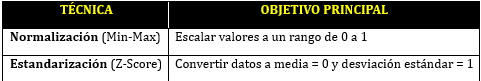

Se aplicó normalización (MinMaxScaler) a variables que tienen distribuciones muy dispersas o con outliers, ya que esta técnica conserva las proporciones sin exagerar los valores extremos.

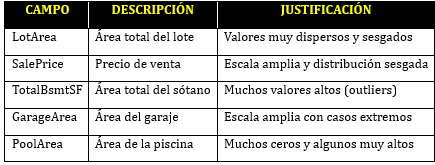

Se aplicó estandarización (StandardScaler) a variables que son más estables y con distribución aproximadamente normal o ordinal, útiles para modelos lineales, regresiones o PCA.

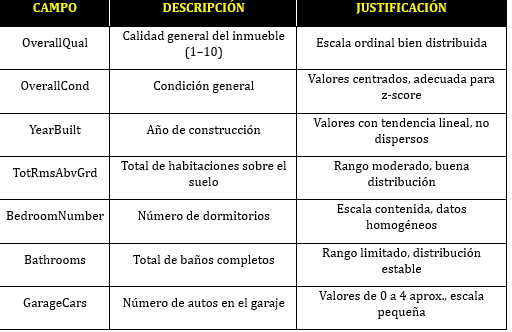

In [54]:
ordinal_map = {
    'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
}
df['ExterQual_encoded'] = df['ExterQual'].map(ordinal_map)

Definir columnas ordinales para Label Encoding (mapa de calidad)

In [59]:
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'PoolQC']
ordinal_map = ['Po', 'Fa', 'TA', 'Gd', 'Ex']  # Orden de peor a mejor

Aplicar codificación ordinal

In [60]:
encoder = OrdinalEncoder(categories=[ordinal_map]*len(ordinal_cols), handle_unknown='use_encoded_value', unknown_value=-1)
df_encoded[ordinal_cols] = encoder.fit_transform(df_encoded[ordinal_cols])

Definir columnas nominales para One-Hot Encoding

In [62]:
nominal_cols = [
    'Street', 'Alley', 'LotShape', 'LotConfig', 'LandSlope', 'BldgType',
    'HouseStyle', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'Fence'
]

 Aplicar One-Hot Encoding solo a las que aún existen

In [66]:
# Verificar columnas que aún existen en df_encoded
nominal_cols_existentes = [col for col in nominal_cols if col in df_encoded.columns]

if nominal_cols_existentes:
    df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols_existentes, drop_first=True)
else:
    print("No quedan columnas nominales disponibles para codificar.")

La opción drop_first=True se usó para evitar la multicolinealidad al eliminar la primera categoría como referencia.

Mostrar las primeras columnas resultantes

In [68]:
df_encoded.head(3)

,LotArea,OverallQual,OverallCond,YearBuilt,ExterQual,ExterCond,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_Sin cerca
0,8450.0,7,5,2003,3.0,2.0,3.0,856.0,4.0,856.0,...,True,False,False,False,False,True,False,False,False,True
1,9453.0,6,8,1976,2.0,2.0,-1.0,1262.0,4.0,1262.0,...,True,False,False,False,False,True,False,False,False,True
2,11250.0,7,5,2001,3.0,2.0,3.0,920.0,4.0,920.0,...,True,False,False,False,False,True,False,False,False,True
